In [33]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from utils import calculate_mse
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/test.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
N, D = tX.shape

In [86]:
# use only outlier-free data for plotting
tX_plot = np.array([row for row in tX if -999. not in row])
tX_plot.shape

(155460, 30)

In [47]:
# NAs are marked as -999
print("tX.head = ", tX[:5,:5])
#print(tX[:5,5:10])
#print(tX[:5,10:15])
print("tX.shape = ",tX.shape)
print("tX.size = ", tX.size, "\n")

print("y.head = ",y[:10])

print(np.where(y == -1))
print(np.unique(y))
print("y.shape = ",y.shape)
print("y.size = ", y.size, "\n")

print("ids.head = ",ids[:10])
print("ids.shape = ", ids.shape)
print("ids.size = ", ids.size, "\n")


tX.head =  [[-999.      79.589   23.916    3.036 -999.   ]
 [ 106.398   67.49    87.949   49.994 -999.   ]
 [ 117.794   56.226   96.358    4.137 -999.   ]
 [ 135.861   30.604   97.288    9.104 -999.   ]
 [  74.159   82.772   58.731   89.646    1.347]]
tX.shape =  (568238, 30)
tX.size =  17047140 

y.head =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(array([], dtype=int64),)
[1.]
y.shape =  (568238,)
y.size =  568238 

ids.head =  [350000 350001 350002 350003 350004 350005 350006 350007 350008 350009]
ids.shape =  (568238,)
ids.size =  568238 



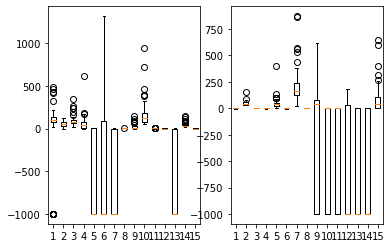

In [59]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.boxplot(tX[:100,:15]);
ax2.boxplot(tX[:100,15:]);




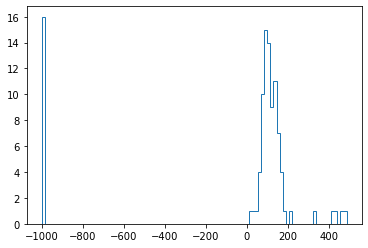

In [70]:
fig, ax = plt.subplots()

ax.hist(tX_plot[:100,:1], bins = 100, histtype='step', stacked=True, fill=False);

# Do your crazy machine learning thing here :) ...

## 1. Exploratory data analysis

## 2. Preprocessing

In [27]:
# Normalize dataset

# Split dataset
split_perc = 0.7
split_ind = int(len(y) * split_perc)

# Training set
y_train = y[:split_ind]
tX_train = tX[:split_ind]
ids_train = ids[:split_ind]

# Validation set
y_val = y[split_ind:]
tX_val = tX[split_ind:]
ids_val = ids[split_ind:]

## 3. Training

In [ ]:
# Set hyperparameters
max_iters = 100
gamma = 0.01
lambda_ = 0.1

# Initialize weights
initial_w = np.random.rand(D+1,)

from implementations import *
# Train
weights_ls_GD, loss_ls_GD = least_squares_GD(y_train, tX_train, initial_w, max_iters, gamma)
weights_ls_SGD, loss_ls_SGD = least_squares_SGD(y_train, tX_train, initial_w, max_iters, gamma)
weights_ls, loss_ls = least_squares(y_train, tX_train)
# weights_rr, loss_rr = ridge_regression(y_train, tX_train, lambda_)
# weights_lr, loss_lr = logistic_regression(y_train, tX_train, initial_w, max_iters, gamma)
# weights_reg_lr, loss_reg_lr = reg_logistic_regression(y_train, tX_train, lambda_, initial_w, max_iters, gamma)

## 4. Evaluation

In [ ]:
weights = weights_ls_GD


## Generate predictions and save output in csv format for submission:

In [ ]:
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '../data/submission.csv'
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

/home/xavi_oliva/Documents/EPFL/Projects/epfl_ml/project1/scripts/implementations.py:12: RuntimeWarning: overflow encountered in matmul
  grad = -tx.T @ err / len(err)
/home/xavi_oliva/Documents/EPFL/Projects/epfl_ml/project1/scripts/implementations.py:11: RuntimeWarning: invalid value encountered in matmul
  err = y - tx @ w


## 4. Evaluation

In [29]:
weights = weights_ls_GD


## Generate predictions and save output in csv format for submission:

In [30]:
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = '../data/submission.csv'
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

ValueError: cannot convert float NaN to integer